In [1]:
import jsonlines
import tqdm
import json
import spacy
import numpy as np 
import pandas as pd
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# import scispacy
import spacy
# import en_core_web_sm

from scipy.spatial.distance import jensenshannon

import joblib

from IPython.display import HTML, display

from ipywidgets import interact, Layout, HBox, VBox, Box
import ipywidgets as widgets
from IPython.display import clear_output

from tqdm import tqdm
from os.path import isfile

import seaborn as sb
import matplotlib.pyplot as plt
plt.style.use("dark_background")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import keras
# from keras import optimizers
# from keras import backend as K
# from keras import regularizers
# from keras.models import Sequential
# from keras.layers import Dense, Activation, Dropout, Flatten
# from keras.layers import Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D 
# from keras.utils import plot_model
# from keras.preprocessing import sequence
# from keras.preprocessing.text import Tokenizer
# from keras.callbacks import EarlyStopping

from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer 
from nltk.tokenize import word_tokenize

import os, re, csv, math, codecs
from sklearn.model_selection import train_test_split
sns.set_style("whitegrid")
np.random.seed(0)

os.environ["CUDA_VISIBLE_DEVICES"]="1"

stop_words = set(stopwords.words('english'))
stop_words.update(['.', ',', '"', "'", ':', ';', '(', ')', '[', ']', '{', '}'])
# DATA_PATH = '/data/szr207/projects/log_analysis/equal_scidocs.csv'
import pickle
from subprocess import check_output
# print(check_output(["ls", DATA_PATH]).decode("utf8"))
# plt.style.use("dark_background")

# DATA_PATH = '/data/szr207/dataset/scidocs/mag/combined.csv'


2023-01-29 17:53:36.766351: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-01-29 17:53:44.190255: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-01-29 17:53:44.190339: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-01-29 17:53:44.194005: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:1d:00.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.77GiB deviceMemoryBandwidth: 836.37GiB/s
2023-01-29 17:53:44.194035: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1
2023-01-29 17:53:44.769621: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2

In [2]:
X = pd.read_csv('features.csv')
Y = pd.read_csv('label.csv')

y_labels = []
for i in Y['label']:
    if i=='title':
        y_labels.append(1.0)
    else:
        y_labels.append(0.0)

In [3]:
X.shape

(96944, 7)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y_labels, test_size=0.2, random_state=0)


In [6]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
from sklearn.ensemble import RandomForestClassifier

clf  = RandomForestClassifier(n_estimators=20, random_state=0)
clf.fit(X_train, y_train)
filename = 'title-classification.sav'
pickle.dump(clf, open(filename, 'wb'))

### Prediction

In [8]:
clf = pickle.load(open(filename, 'rb'))

In [9]:
pred_final = pd.read_csv('pred_features.csv')

In [10]:
pred_label = pd.read_csv('label_pred.csv')

y_test = []
for i in pred_label['label']:
    if i=='title':
        y_test.append(1.0)
    else:
        y_test.append(0.0)

In [11]:
lables = list(clf.classes_)
y_pred = clf.predict(pred_final)

In [14]:
dataframe = pd.DataFrame(y_pred, columns = ['pred_result'])

In [15]:
titles = pd.read_csv('titles.csv')
result = pd.concat([titles, dataframe], axis = 1)
result.to_csv('predicted_result_title.csv', index = None)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[  0   0]
 [  1 498]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      1.00      1.00       499

    accuracy                           1.00       499
   macro avg       0.50      0.50      0.50       499
weighted avg       1.00      1.00      1.00       499

0.9979959919839679


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
y_pred[:100]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1.])

## Prediction

In [9]:
features = X.columns
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.legend( prop={'size': 12})

plt.xlabel('Relative Importance')
plt.show()

In [10]:
df_pred_final = pd.read_csv('pred_features.csv')

In [11]:
pred_final_array = df_pred_final.to_numpy()

In [12]:
Y_pred = sc.fit_transform(pred_final_array)


In [13]:
y_pred_pred = clf.predict(Y_pred)

In [14]:
print(confusion_matrix(y_test,y_pred_pred))
print(classification_report(y_test,y_pred_pred))
print(accuracy_score(y_test, y_pred_pred))

ValueError: Found input variables with inconsistent numbers of samples: [19389, 499]

<BarContainer object of 2 artists>

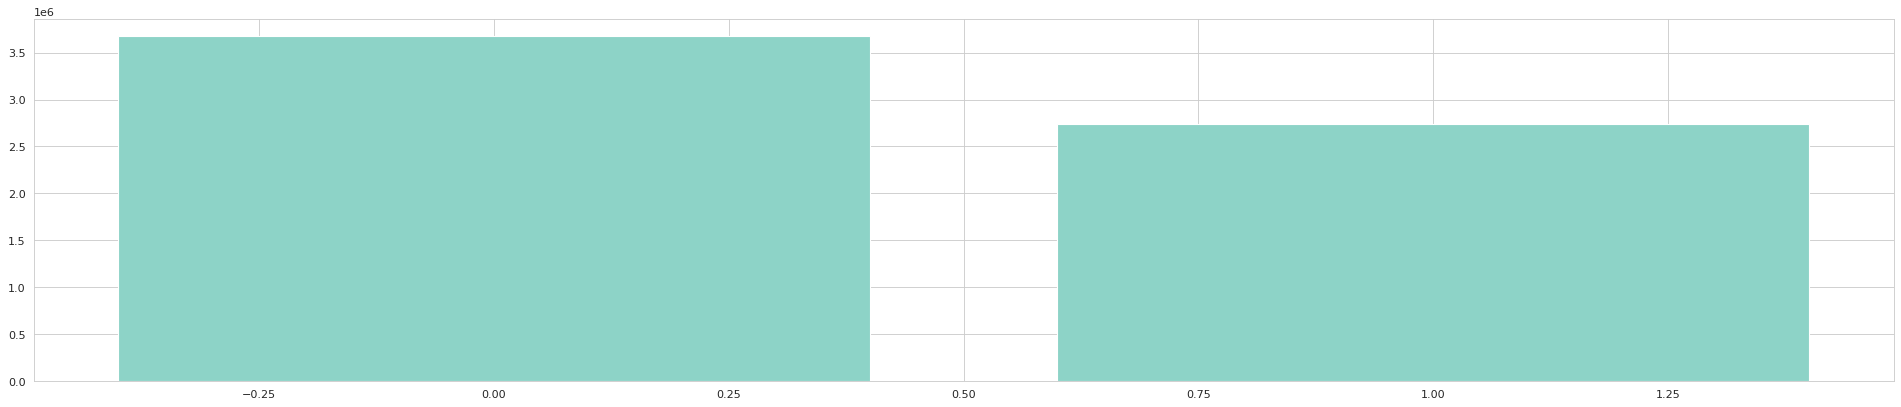

In [105]:
from collections import Counter
import pandas as pd
# a = ['a', 'a', 'a', 'a', 'b', 'b', 'c', 'c', 'c', 'd', 'e', 'e', 'e', 'e', 'e']
letter_counts = Counter(df_pred_final['pred_label'])
# pd.Series(letter_counts).value_counts().plot('bar')

dict_thresh = {}
for key in letter_counts:
#     if key < 100:
    dict_thresh[key] = letter_counts[key]
dict_thresh = dict(sorted(dict_thresh.items(), key=lambda item: item[1]))
from matplotlib.pyplot import figure
figure(num=None, figsize=(30, 6), dpi=80)
# plt.yscale('log')
plt.bar(list(dict_thresh.keys()),list(dict_thresh.values()))

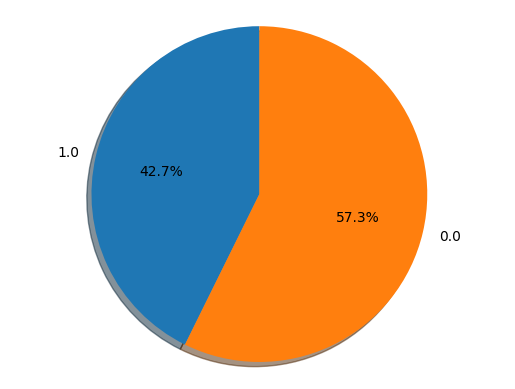

In [106]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = list(dict_thresh.keys())
sizes = list(dict_thresh.values())
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
import matplotlib as mpl

th = np.linspace(0, 2*np.pi, 128)



mpl.style.use('default')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [77]:
letter_counts

Counter({1.0: 2738326, 0.0: 3675791})

In [112]:
final_dict = {'title search': 2738326, 'keyword search' : 3675791,
              'author search' : 986736 
}

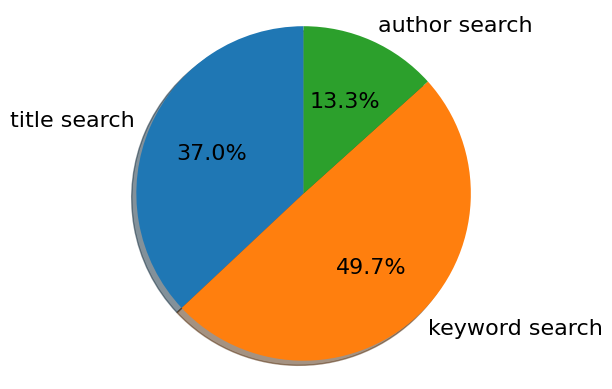

In [128]:
import matplotlib.pyplot as plt
import matplotlib
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = list(final_dict.keys())
sizes = list(final_dict.values())
# explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
import matplotlib as mpl

th = np.linspace(0, 2*np.pi, 128)

matplotlib.rcParams.update({'font.size': 30})

import matplotlib as mpl
mpl.rcParams['font.size'] = 16
# mpl.style.use('default')
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# ax1.set_title('Query Intent Distribution', fontsize=18)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
# plt.rc('font', size=40)          # controls default text sizes

plt.show()

In [66]:
X_test

array([[-0.79413952, -0.29007038, -0.55527113, ...,  1.01775158,
         0.1809303 ,  0.70150804],
       [-0.79413952, -0.29007038, -0.55527113, ...,  0.94416983,
         0.28267475,  0.69927682],
       [-0.79413952, -0.29007038, -0.55527113, ...,  0.82842021,
         0.4285867 ,  0.6897518 ],
       ...,
       [ 1.15783943, -0.29007038,  1.06587225, ..., -0.79263543,
        -0.98066076, -0.86131867],
       [ 1.54823522, -0.29007038, -0.55527113, ..., -0.82980583,
        -0.71080293, -1.05610564],
       [-0.92427145, -0.29007038, -0.55527113, ...,  1.84184751,
         1.34058947,  1.70458154]])

In [65]:
type(df_pred_final)

pandas.core.frame.DataFrame

In [73]:
pred_final_array

array([[0.00324675, 0.        , 0.        , ..., 0.63346754, 0.77376927,
        0.7036184 ],
       [0.00974026, 0.00769231, 0.0023753 , ..., 0.08143966, 0.62000061,
        0.39788183],
       [0.00162338, 0.        , 0.        , ..., 0.458962  , 0.8884559 ,
        0.67370895],
       ...,
       [0.00487013, 0.        , 0.        , ..., 0.2779897 , 0.58772174,
        0.32989714],
       [0.00487013, 0.        , 0.        , ..., 0.38618957, 0.63712122,
        0.47042179],
       [0.00324675, 0.        , 0.        , ..., 0.44833154, 0.67355913,
        0.58763673]])

In [80]:
df_preds_title = pd.Series(y_pred_pred,
              name="pred_label")
df_preds_title = df_preds_title.to_frame()

In [ ]:
# df_pred_final = pd.concat([ ,df_preds_title], axis=1)

In [99]:
data_pred_file = pd.read_csv('../filtered_query_setxPERSONxNSFW.csv')

In [100]:
data_pred_file = data_pred_file.drop(['index', 'ner'], axis=1)
data_pred_file = data_pred_file.rename(columns={"0": "text"})
data_pred_file = data_pred_file.dropna().reset_index(drop=True)

In [102]:
df_pred_final = pd.concat([data_pred_file, df_preds_title ], axis=1)

In [104]:
df_pred_final.to_csv('prediction_titles.csv',index=False)

In [98]:
data_pred_file

,text
0,file allocation problem bs89
1,Gaurish Telang
2,twelve utterance
3,César Cárdenas
4,nonsingular toric 3-folds
...,...
809922,Yoshito Kanamori
809923,Towards Self-Aware Materials
809924,"""Conceptual Learning in Database Design."""
809925,Causal temporal order in HCI.


In [89]:
df_pred_final = pd.concat([data_pred_file, df_preds_title ], axis=1)

In [132]:
list(df_pred_final[df_pred_final['pred_label']==1.0][100:200]['text'])

['New etching techniques for semiconductors.',
 'R2O: Relation to Ontology Transformation System.',
 'multiangular measurement system',
 'Semi-Online Machine Covering.',
 'Learning by Failure to Prove.',
 'title:namelessly',
 'nominal exchange rate variability',
 '"A New Module System for Prolog."',
 '"General Purpose 50 GHz Transmitter-Receiver."',
 'hash-based search method',
 'quantum search of spatial regions.',
 'Program Comprehension through Data Mining.',
 'integral part towards final closure',
 'Correlation Self-Expression Shrunk for Subspace Clustering.',
 '國共內戰 美國',
 'real world owl ontology',
 'A survey on search-based model-driven engineering.',
 'Delft-Java Dynamic Translation.',
 'perceptual linear predictive coefficient',
 'one-time setup',
 'upper laser level belong',
 'Eyes Only: Navigating Hypertext with Gaze.',
 '"Informant Detecting Sybils Using Incentives."',
 'gprs wireless mobile link',
 'Stability of a convex feasibility problem.',
 'specific tidal datum',
 'Log

In [133]:
list(df_pred_final[df_pred_final['pred_label']==0.0][100:200]['text'])

['sterility trigger',
 'automatic alarm',
 'supervised problem',
 'train-ing procedure scale',
 'bien ma tris',
 'tubular delay',
 'ep1 receptor',
 'multiallelic site',
 'postulated speaker',
 'antagonistic pcbs',
 'convenient programming model',
 'top software engineering journal',
 'smooth aspect',
 'instar length',
 'haem oxygenase',
 'citation sentence',
 'constrained object',
 'extracellular ph regulation',
 'axis code',
 'frac cence',
 'different conceptual level',
 'strong cross section dependence',
 'crushed fruit',
 'mutated factor',
 'tameness assumption',
 'struc-tural evolution',
 'accurate descriptor',
 'many perception problem',
 'c-jun binding',
 'depreciatory.spragma.info',
 'present b-flashsort',
 'raw version',
 'animal welfare science',
 'fuzzy knowledge',
 'dune slope',
 'individual scattering reaction',
 'resolu tion',
 'well-explored technique',
 'period pnd',
 'system software',
 ' mantenimiento',
 'dispersal probability',
 'internal mixing',
 'heavy gas dispersi

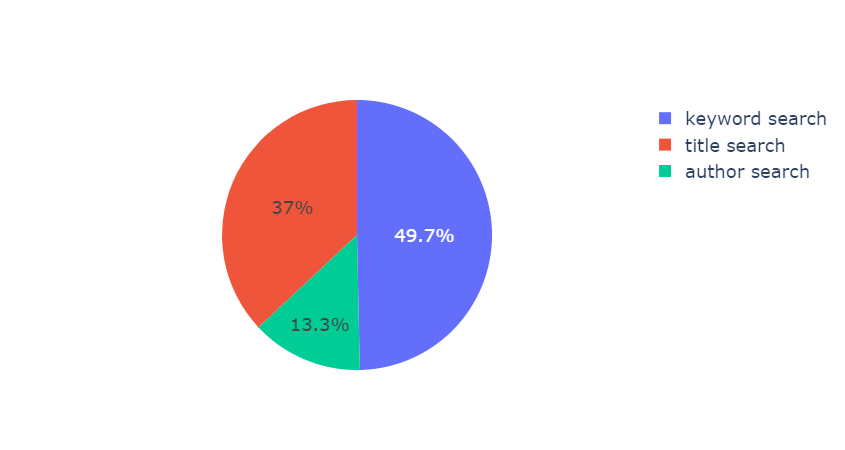

In [171]:
final_dict = {'title search': 2738326, 'keyword search' : 3675791,
              'author search' : 986736 
}

import plotly.graph_objects as go

labels = []
values = []

for idx in final_dict:
    labels.append(idx)
    values.append(final_dict[idx])

# fig = go.Figure(data=[go.Pie(labels=labels, values=values, textinfo='label+percent',insidetextorientation='radial')])
fig = go.Figure()
fig.add_trace(
    go.Pie(labels=labels, values=values, textinfo='percent'))

fig.update_layout(
    width=500, height=450,  showlegend=True,
    font=dict(
        size=18
    ),
#     height=1200
#     title_text="test",
)

fig.show()